In [1]:
import pandas as pd
import numpy as np 
from backtest.tools import get_daily_data, factor_backtest
start_date = '2021-01-01'
end_date = '2025-01-01'

## Step 1: 获取日频数据字段

In [2]:
df = get_daily_data(start_date, end_date)
df

,date,stock_code,name,open,close,high,low,volume,amount,days_to_pre_trading_day,...,total_share,floating_share,turnover,market_cap,floating_market_cap,floating_a_share,floating_b_share,floating_a_market_cap,floating_b_market_cap,latest_dividend_pct_date
0,2021-01-04,000001,平安银行,2871.518,2796.347,2871.518,2772.293,155421643,2.891682e+09,2.0,...,19405918198,19405754475,0.00801,3.609501e+11,3.609470e+11,1.940575e+10,NaN,3.609470e+11,NaN,2020-12-31
1,2021-01-04,000002,万科A,3431.276,3356.368,3431.276,3324.955,146844133,4.079417e+09,2.0,...,11617732201,11611088933,0.01264,3.227406e+11,3.225561e+11,9.717553e+09,NaN,2.699536e+11,NaN,2020-12-31
2,2021-01-04,000006,深振业A,375.764,367.769,375.764,366.437,8132668,4.502973e+07,2.0,...,1349995046,1349995046,0.00602,7.451973e+09,7.451973e+09,1.349995e+09,NaN,7.451973e+09,NaN,2020-12-31
3,2021-01-04,000007,全新好,75.553,75.553,75.553,75.553,850900,5.335143e+06,2.0,...,346448044,308948044,0.00246,2.172229e+09,1.937104e+09,3.089480e+08,NaN,1.937104e+09,NaN,2017-05-22
4,2021-01-04,000008,神州高铁,68.309,67.771,68.578,67.502,13795696,3.479629e+07,2.0,...,2780795346,2665216688,0.00496,7.007604e+09,6.716346e+09,2.665217e+09,NaN,6.716346e+09,NaN,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665160,2024-12-31,920445,龙竹科技,11.302,11.791,12.281,11.302,6073684,4.545979e+07,1.0,...,148882025,105262791,0.04080,1.112149e+09,7.863130e+08,NaN,NaN,NaN,NaN,2024-11-08
4665161,2024-12-31,920489,佳先股份,30.309,29.413,31.332,29.323,4567348,7.770360e+07,1.0,...,136459200,85693749,0.03347,2.237931e+09,1.405377e+09,NaN,NaN,NaN,NaN,2023-11-24
4665162,2024-12-31,920682,球冠电缆,16.554,16.618,17.168,16.448,4178539,3.321249e+07,1.0,...,270400000,156937018,0.01545,2.122640e+09,1.231956e+09,NaN,NaN,NaN,NaN,2024-11-01
4665163,2024-12-31,920799,艾融软件,164.183,161.090,170.055,160.965,5505984,2.902951e+08,1.0,...,209780050,117784571,0.02625,1.081836e+10,6.074150e+09,NaN,NaN,NaN,NaN,2024-12-31


## Step 2: 因子逻辑计算

In [3]:
# 一个示例因子的计算
def get_factor(df):
    df['downshadow'] = np.where(df['open'] < df['close'], df['open'] - df['low'], df['close'] - df['low'])
    df['downmean'] = df.groupby('stock_code')['downshadow'].transform(lambda x: x.rolling(20).mean())
    df['downshadow_adj'] = df['downshadow'] / df['downmean']
    df['downshadow_mean_normalized'] = df.groupby('date')['downshadow_adj'].transform(lambda x: (x - x.mean()) / x.std())
    df['factor'] = df['downshadow_mean_normalized']
    return df[['stock_code','date','factor']]
factor_df = get_factor(df)
factor_df

,stock_code,date,factor
0,000001,2021-01-04,NaN
1,000002,2021-01-04,NaN
2,000006,2021-01-04,NaN
3,000007,2021-01-04,NaN
4,000008,2021-01-04,NaN
...,...,...,...
4665160,920445,2024-12-31,-0.793420
4665161,920489,2024-12-31,-0.452407
4665162,920682,2024-12-31,0.121658
4665163,920799,2024-12-31,-0.673565


## Step 3: 因子分析和回测结果生成

Process: 因子预处理...
Process: 因子截面MAD去极值...
Process: 因子Zscore标准化...
Process: 因子分层回测...
Process: 绘制分层曲线...
Process: 因子IC分析...
Process: 因子换手率分析...
Finished


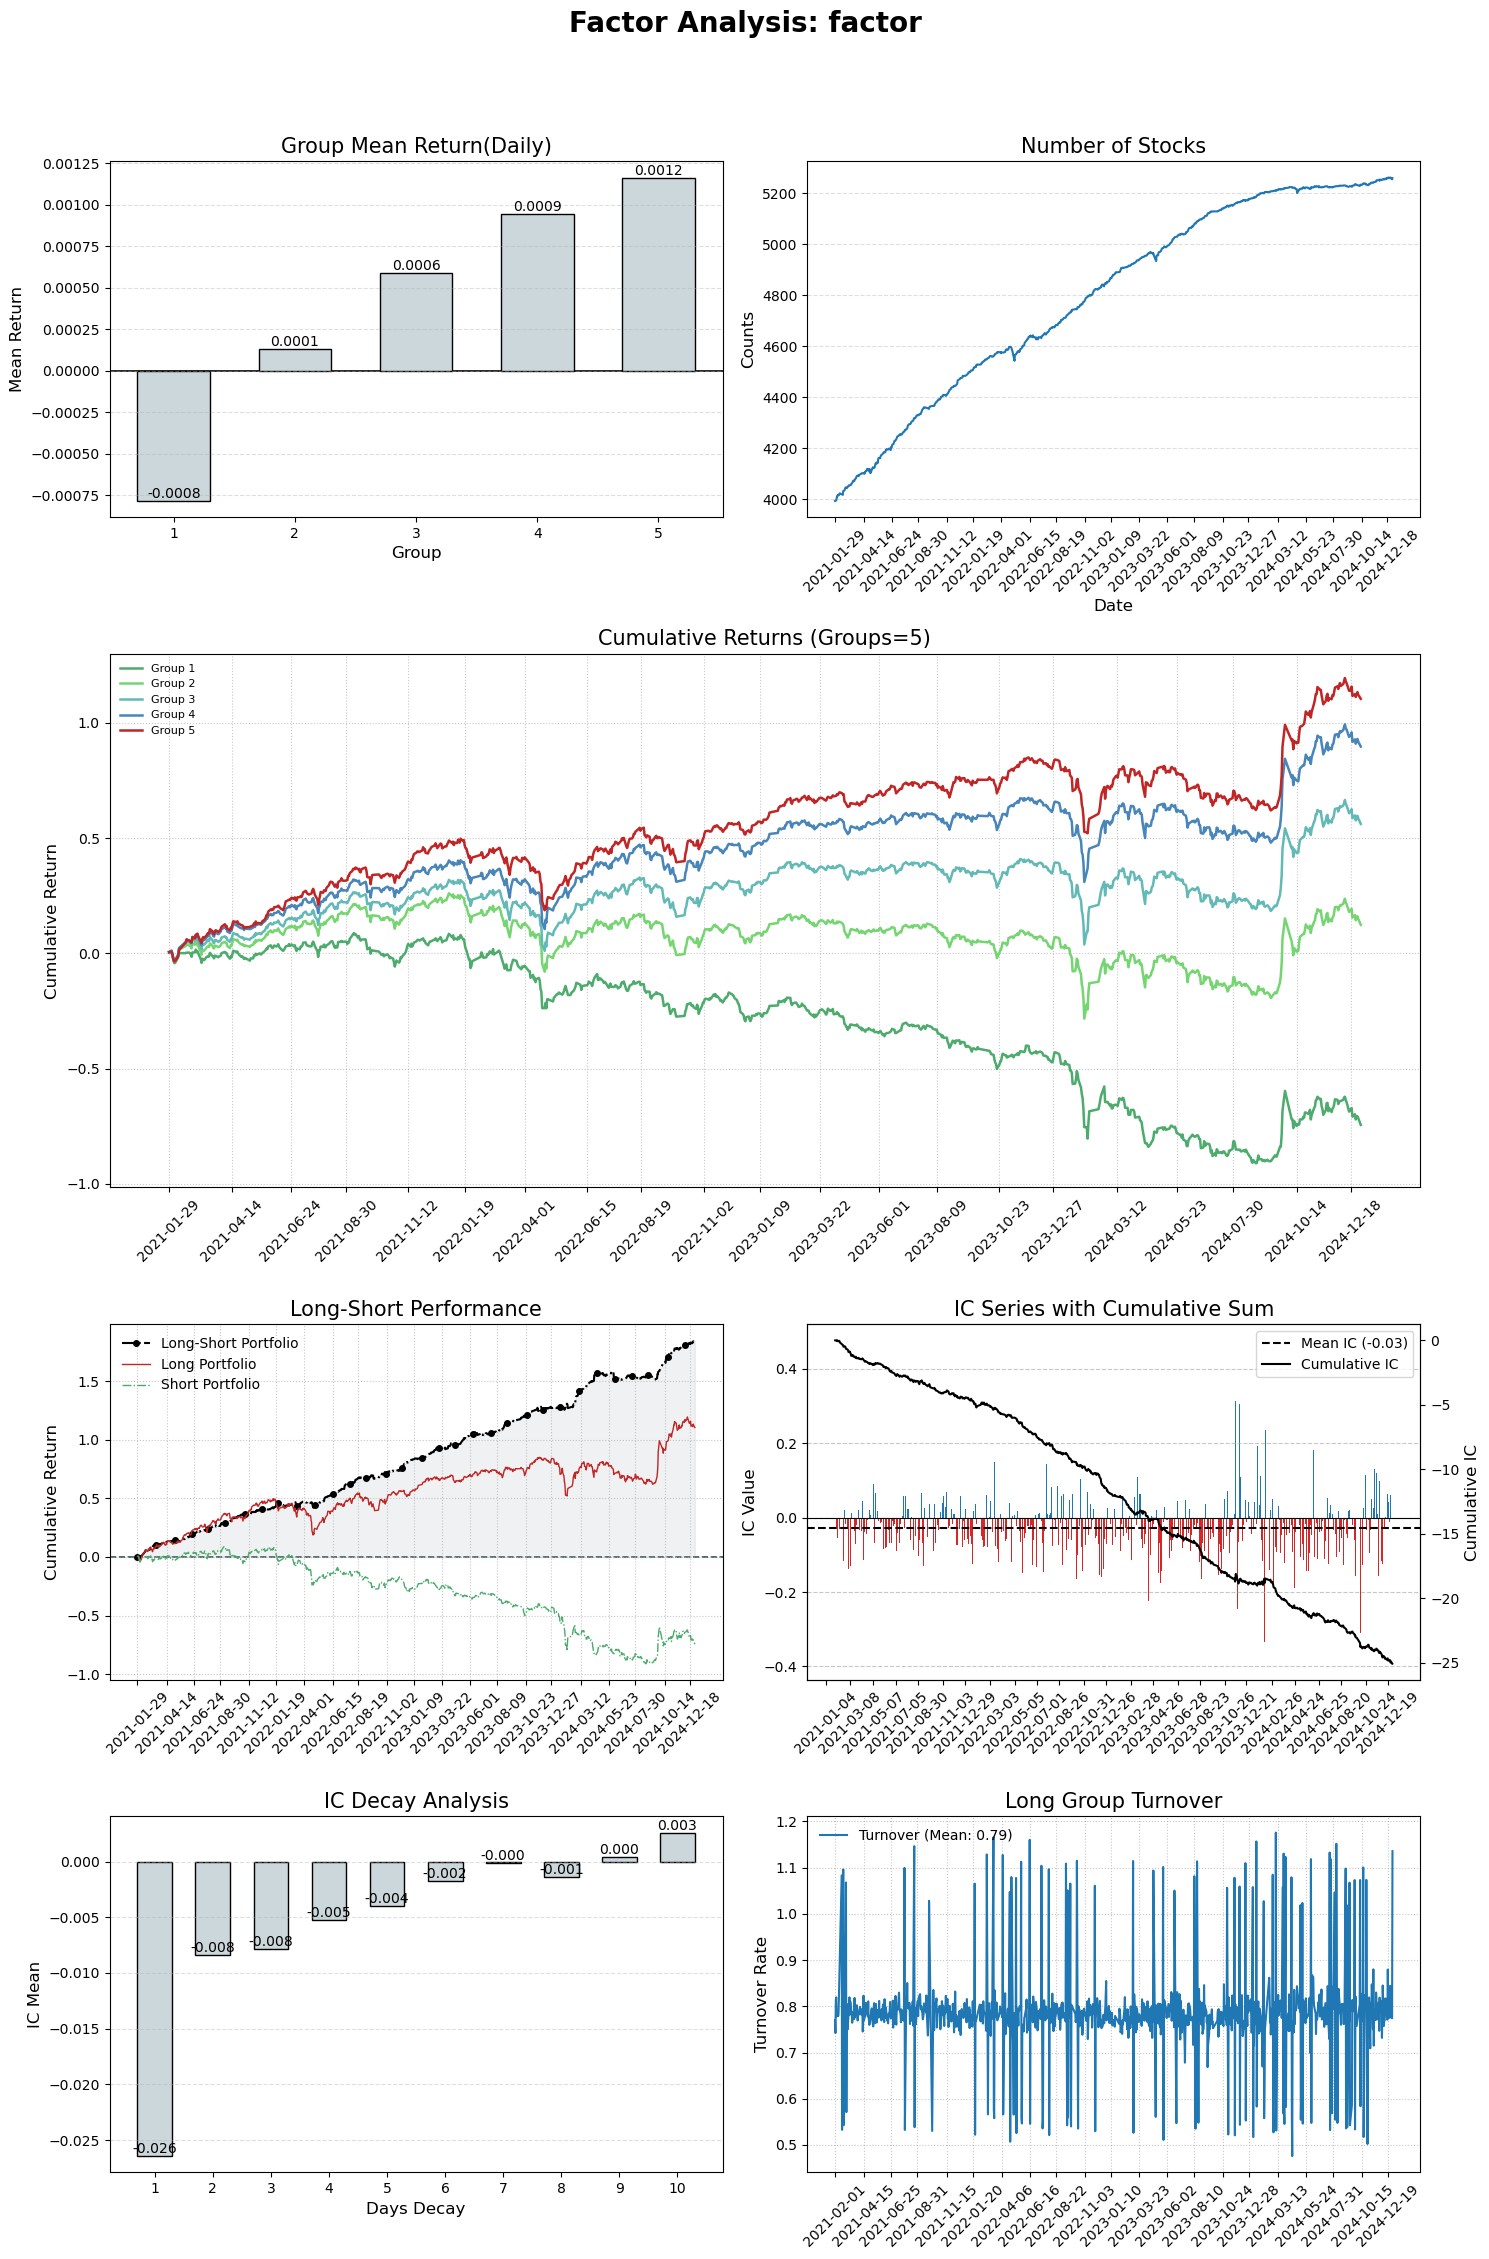

+--------------------+-----------+
| IC                 | -0.026    |
+--------------------+-----------+
| ICIR               |  0.342    |
+--------------------+-----------+
| Long Annual Return |  0.293    |
+--------------------+-----------+
| Long Max Drawdown  |  0.287    |
+--------------------+-----------+
| Long Sharpe        |  0.812    |
+--------------------+-----------+
| Short Max Drawdown |  0.655    |
+--------------------+-----------+
| Short Sharpe       | -1.287    |
+--------------------+-----------+
| LS Annual Return   |  0.491    |
+--------------------+-----------+
| LS Max Drawdawn    |  0.068    |
+--------------------+-----------+
| LS Sharpe          |  3.288    |
+--------------------+-----------+
| turnover           |  0.785419 |
+--------------------+-----------+


,IC,ICIR,Long Annual Return,Long Max Drawdown,Long Sharpe,Short Max Drawdown,Short Sharpe,LS Annual Return,LS Max Drawdawn,LS Sharpe,turnover
value,-0.0260,0.3420,0.2930,0.2870,0.8120,0.6550,-1.2870,0.4910,0.0680,3.2880,0.7854


In [4]:
# 分组收益图绘制，注意组号5为多头组，组号1为空头组
result, group_returns, ic = factor_backtest(factor_df,
                                            factor_name = 'factor', # 因子名称
                                            start_date = start_date,
                                            end_date = end_date, 
                                            lag_days = 1, # 用滞后多少日的收益率
                                            direction = -1, # 因子方向
                                            group = 5,   # 因子分组数
                                            neutralization = False, # 因子中性化选项
                                            zscore = True, # 因子标准化选项
                                            cut_extreme = True # 是否剔除极端值
                                            )
result